# Sioux Falls

Parameter perturbation analysis with the Sioux Falls instance. The graph was took from the TransportationNetworks git repository and the demand matrix from the Liu paper and consists of 22 pairs origin-destination.

The parameters that are analyzed are:
- Budget
- Breakpoints
- Infrastructure count

In [135]:
import csv
import functools
import os
from pprint import pp
import random

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import bcnetwork as bc

## Reading data

The models and solution data is read from a directory populated elsewhere.

In [31]:
data_dir = '../data/sensibility_10_cplex'

def get_solution_path(model_name):    
    return os.path.join(data_dir, f'solution_{model_name}.pkl')

def get_solution(model_name):
    return bc.solution.Solution.load(get_solution_path(model_name))

df = pd.read_csv(os.path.join(data_dir, 'aexecution_summary.csv'))

In [8]:
df

,name,total_demand_transfered,total_demand_transfered_percentage,m,infrastructure_count,budget,budget_factor,budget_used,breakpoint_count,transfer_function,run_time_seconds,run_time_seconds_str,did_timeout,gap,uid
0,sioux_falls_0.1_budget_factor_linear_5_breakpo...,12.0,4.651163,0.4,6,31.4,0.1,31,5,lineal,2,00:00:02,False,NaN,09c88ee5646c3fe2a0a4db5a
1,sioux_falls_0.1_budget_factor_linear_20_breakp...,15.0,5.813953,0.4,6,31.4,0.1,31,20,lineal,11,00:00:11,False,NaN,1f60da2eaabf52c2d5b8553c
2,sioux_falls_0.1_budget_factor_inv_logit_5_brea...,12.0,5.128205,0.4,6,31.4,0.1,30,5,logit,1,00:00:01,False,NaN,9faf65e62575b1dd6225a11b
3,sioux_falls_0.1_budget_factor_inv_logit_20_bre...,15.0,6.410256,0.4,6,31.4,0.1,31,20,logit,8,00:00:08,False,NaN,5d4a343f512afab635f25d27
4,sioux_falls_0.4_budget_factor_sad_5_breakpoints,72.0,32.432432,0.4,6,125.6,0.4,125,5,concave down,36,00:00:36,False,NaN,b5f4663cecf1686c1df4733b
5,sioux_falls_0.4_budget_factor_sad_20_breakpoints,81.0,36.486486,0.4,6,125.6,0.4,125,20,concave down,460,00:07:40,False,NaN,c1009d4e61f8a3d11068fcb4
6,sioux_falls_0.4_budget_factor_sad_50_breakpoints,83.0,37.387387,0.4,6,125.6,0.4,125,50,concave down,449,00:07:29,False,NaN,8cc7d4d506791792f7548ba0
7,sioux_falls_0.4_budget_factor_happy_5_breakpoints,40.0,15.503876,0.4,6,125.6,0.4,125,5,concave up,18,00:00:18,False,NaN,a9674d408a90db1985e57404
8,sioux_falls_0.4_budget_factor_happy_20_breakpo...,44.0,17.054264,0.4,6,125.6,0.4,125,20,concave up,578,00:09:38,False,NaN,ef686662179016840705ca63
9,sioux_falls_0.4_budget_factor_happy_50_breakpo...,47.0,18.217054,0.4,6,125.6,0.4,125,50,concave up,50829,14:07:09,False,NaN,ee837e6d464d9d4ef2a32017


## Sioux falls instance - case study

Instancias con funcion lineal, budget 0.4 y puntos de quiebre 5, 20 y 50. Anali de uso de budget si solo se cambia la cantidad de puntos de quiebre.

In [134]:
bdf = pd.read_csv(os.path.join(data_dir, 'abudget_use_summary.csv'))

infra_length_columns = [c for c in bdf.columns if 'length' in c]
bdf['total_length'] = bdf[infra_length_columns].fillna(0.0).apply(np.sum, axis=1)
bdf.iloc[10:13][['name', 'total_length'] + infra_length_columns]

,name,total_length,infra_1_length_percentage,infra_2_length_percentage,infra_3_length_percentage,infra_4_length_percentage,infra_5_length_percentage
10,sioux_falls_0.4_budget_factor_linear_5_breakpo...,20.981012,8.743291,6.513234,5.724486,NaN,NaN
11,sioux_falls_0.4_budget_factor_linear_20_breakp...,25.759937,8.891837,15.226906,1.641194,NaN,NaN
12,sioux_falls_0.4_budget_factor_linear_50_breakp...,22.734565,2.993976,17.773265,1.967324,NaN,NaN


In [27]:
df.iloc[10:13]

,name,total_demand_transfered,total_demand_transfered_percentage,m,infrastructure_count,budget,budget_factor,budget_used,breakpoint_count,transfer_function,run_time_seconds,run_time_seconds_str,did_timeout,gap,uid
10,sioux_falls_0.4_budget_factor_linear_5_breakpo...,48.0,18.604651,0.4,6,125.6,0.4,125,5,lineal,24,00:00:24,False,NaN,c6d3463852b0d9a4c84cb64a
11,sioux_falls_0.4_budget_factor_linear_20_breakp...,55.0,21.317829,0.4,6,125.6,0.4,125,20,lineal,377,00:06:17,False,NaN,dfe4df4af96f6b2055817acf
12,sioux_falls_0.4_budget_factor_linear_50_breakp...,57.0,22.093023,0.4,6,125.6,0.4,125,50,lineal,1915,00:31:55,False,NaN,81910a5e75391f2dd99979eb


### Shortest path result comparison

#### Sum of all shortest path cost

In [50]:
def get_demand_transfered_by_od(solution):
    return {
        (od.origin, od.destination): od.demand_transfered
        for od in solution.data.demand_transfered
    }

def get_shortest_path_by_od(solution):
    return {
        (od.origin, od.destination): od.shortest_path_cost
        for od in solution.data.shortest_paths
    }

In [51]:
instances = list(range(10, 13))
solutions = [get_solution(df.iloc[index]['name']) for index in instances]

sols_data = [
    (get_demand_transfered_by_od(s), get_shortest_path_by_od(s))
    for s in solutions
]

In [59]:
pd.DataFrame([
    {'instance': instance, 'total_shortest_path_cost': sum(sol_data[1].values())}
    for instance, sol_data in zip(instances, sols_data)
])

,instance,total_shortest_path_cost
0,10,223.28
1,11,220.32
2,12,221.76


#### Comparison of shortest path cost weighted by demand transfer for each instance.

In [195]:
with open('../instances/sioux-falls/origin_destination.csv', 'r') as demand_file:
    od_order = [(r['origin'], r['destination']) for r in csv.DictReader(demand_file)]

label_by_od = {od:str(index) for index, od in enumerate(od_order, 1)}

def was_demand_transfered_for_any_instance(od):
    return sum(
        [sols_data[index][0][od] for index in range(len(sols_data))]
    ) != 0

od_order_with_demand = list(filter(
    was_demand_transfered_for_any_instance,
    od_order
))

demand_transfered_by_instance = {
    instance: np.array([sol_data[0][od] for od in od_order_with_demand])
    for instance, sol_data in zip(instances, sols_data)
}

shortest_path_by_instance = {
    instance: np.array([sol_data[1][od] for od in od_order_with_demand])
    for instance, sol_data in zip(instances, sols_data)
}

In [209]:
data = {}
for row_instance in instances:
    result = [
        np.inner(
            shortest_path_by_instance[row_instance],
            demand_transfered_by_instance[column_instance].T,
        )
        for column_instance in instances
    ]
    data[row_instance] = dict(zip(instances, list(result)))
pd.DataFrame(data)     

,10,11,12
10,392.36,406.76,395.72
11,479.56,471.24,468.60
12,491.80,490.92,480.60


Comparativa de demanda transferida y costo del camino más corto por par origen-destino para las 3 instancias estudiadas. Solo considere los pares origne destino con demanda transferida.

In [210]:
xticks_labels = [label_by_od[od] for od in od_order_with_demand]

def draw_bars(ax, labels, data, width=0.25, colors=None):
    """
    Data is an array of same N-size tuples.
    Labels is a tuple/list of size N.
    """
    n = len(data[0])
    colors = colors or list(bc.colors.values())
    data_by_index = list(zip(*data))
    x_mean = np.array(list(range(len(data))))
    
    for index in range(n):
        x = x_mean - width * (n / 2 - index)
        ax.bar(
            x,
            data_by_index[index],
            width=width,
            label=labels[index],
            color=colors[index],
        )
        
    ax.set_xlabel("Par origen-destino")
    ax.set_xticks(list(range(0, len(od_order_with_demand))))
    ax.set_xticklabels(xticks_labels)
    ax.legend()

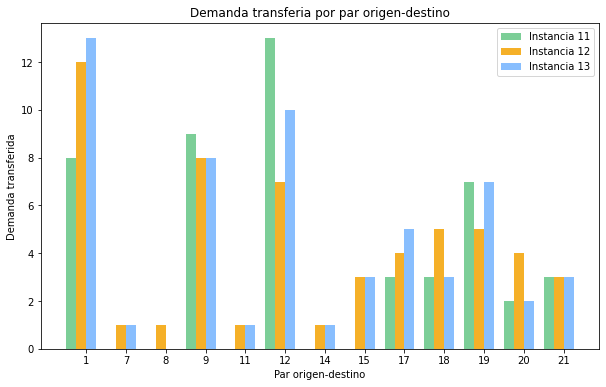

In [227]:
colors = [bc.colors.green_light, bc.colors.yellow, bc.colors.sky_blue]
labels = [f'Instancia {inst + 1}' for inst in instances]
draw_instance_bars = functools.partial(draw_bars, colors=colors)

fig, ax = plt.subplots(figsize=(10, 6))
demand_transfered_data = list(zip(*[demand_transfered_by_instance[instance] for instance in instances]))
draw_instance_bars(ax, labels, demand_transfered_data)
ax.set_ylabel("Demanda transferida")
ax.set_title("Demanda transferia por par origen-destino")
fig.savefig('../thesis/resources/sensibility_case_study_demand.png', dpi=300, bbox_inches='tight')

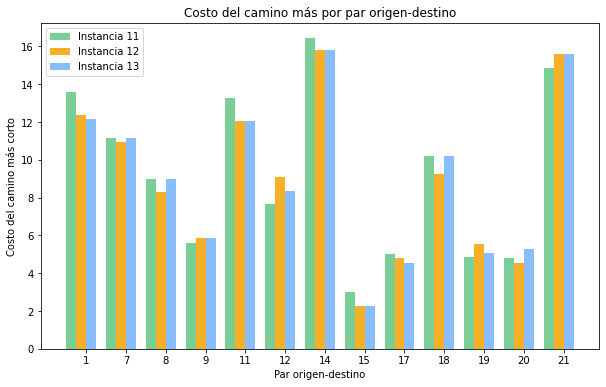

In [228]:
fig2, ax2 = plt.subplots(figsize=(10, 6))

shortest_path_data = list(zip(*[shortest_path_by_instance[instance] for instance in instances]))
draw_instance_bars(ax2, labels, shortest_path_data)
ax2.set_ylabel("Costo del camino más corto")
ax2.set_title("Costo del camino más por par origen-destino")
fig2.savefig('../thesis/resources/sensibility_case_study_shortest_paths.png', dpi=300, bbox_inches='tight')